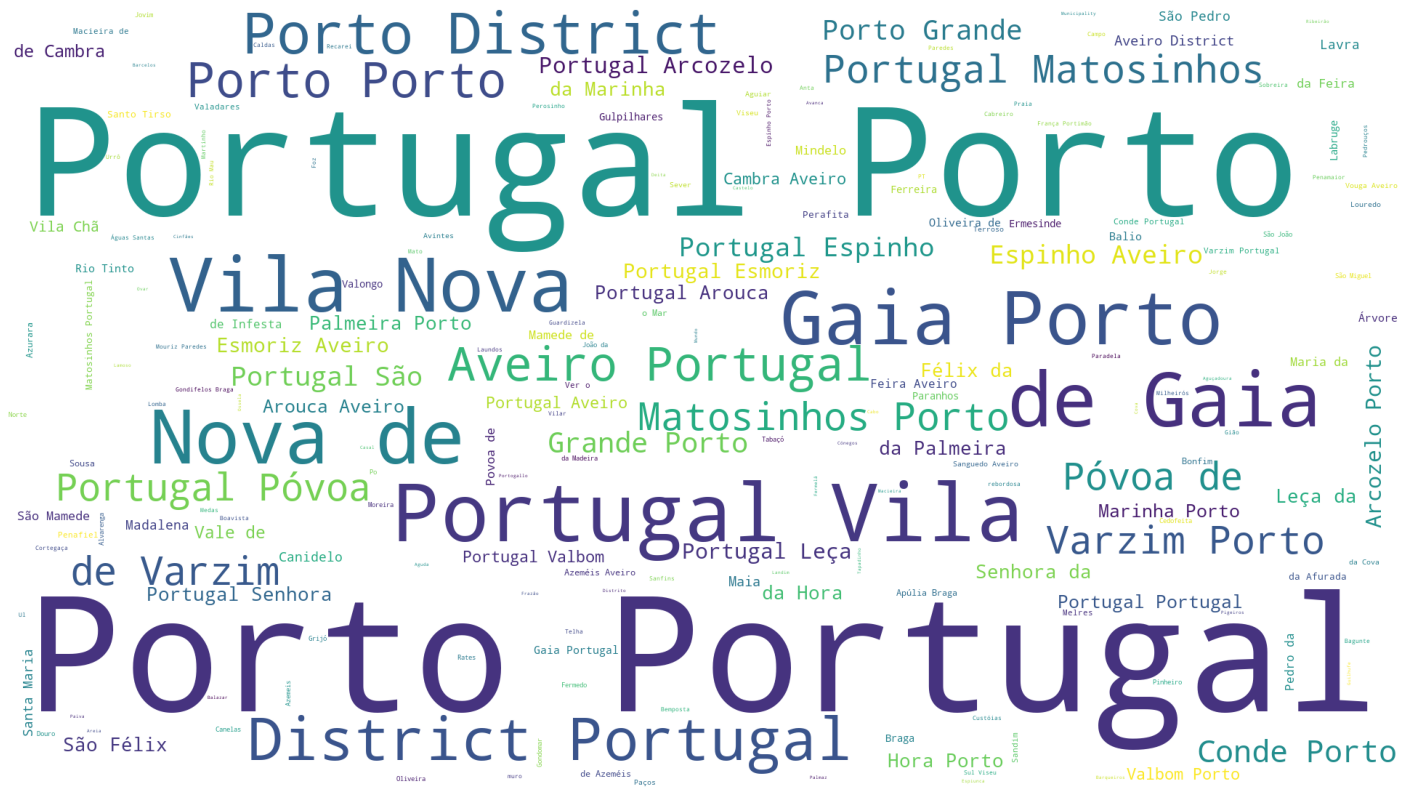

In [151]:
# Ciudad de Porto (Portugal) Junio 2022

from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(portolisting.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [121]:
#Importamos modulos 
!pip install geopandas
!pip install chart_studio

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [124]:
# Instalamos la librería para manipular la API
! pip install -q kaggle

In [113]:
# Tras hacernos un usuario en Kaggle, vamos a la sección 'account'--> 'API'
# y seleccionamos 'Create New API Token'. Subimos aquí ese fichero.
#from google.colab import files
#files.upload()

In [114]:
# Creamos un directorio para alojar ese fichero
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
# Asignamos credenciales especiales para ser manipuldo por la API
#! chmod 600 ~/.kaggle/kaggle.json

In [115]:
#from google.colab import drive
#drive.mount('/content/drive')

In [125]:
portolisting = pd.read_csv("/Users/lara/Desktop/datarepo-upgradehub-main-master/Airbnb/listings.csv")
portolisting = pd.DataFrame (portolisting)

In [126]:
portocalendar = pd.read_csv("/Users/lara/Desktop/datarepo-upgradehub-main-master/Airbnb/calendar.csv")
portocalendar = pd.DataFrame (portocalendar)

In [127]:
portoneighbourhoods = pd.read_csv("/Users/lara/Desktop/datarepo-upgradehub-main-master/Airbnb/neighbourhoods.csv")
portoneighbourhoods = pd.DataFrame (portoneighbourhoods)

In [128]:
portoreviews = pd.read_csv ("/Users/lara/Desktop/datarepo-upgradehub-main-master/Airbnb/reviews.csv")
portoreviews = pd.DataFrame (portoreviews)

In [129]:
portoreviews2 = pd.read_csv ("/Users/lara/Desktop/datarepo-upgradehub-main-master/Airbnb/reviews-2.csv")
portoreviews2 = pd.DataFrame (portoreviews2)

In [130]:
portolisting.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1395
Length: 74, dtype: int64

In [131]:
# enseñar columnas mayores de 0 dividir entre en total y * 100
portolisting.isnull().sum()[portolisting.isnull().sum()>0]

description                        7
neighborhood_overview           4287
host_name                          1
host_since                         1
host_location                     15
host_about                      5642
host_response_time              1762
host_response_rate              1762
host_acceptance_rate            1529
host_is_superhost                  1
host_thumbnail_url                 1
host_picture_url                   1
host_neighbourhood             10583
host_listings_count                1
host_total_listings_count          1
host_has_profile_pic               1
host_identity_verified             1
neighbourhood                   4287
bathrooms                      11114
bathrooms_text                    14
bedrooms                        1089
beds                             102
calendar_updated               11114
first_review                    1395
last_review                     1395
review_scores_rating            1395
review_scores_accuracy          1436
r

In [132]:
# show the columns with null values in % portolistings plus 0
portolisting.isnull().sum()[portolisting.isnull().sum()>0]/portolisting.shape[0]*100

description                      0.062984
neighborhood_overview           38.572971
host_name                        0.008998
host_since                       0.008998
host_location                    0.134965
host_about                      50.764801
host_response_time              15.853878
host_response_rate              15.853878
host_acceptance_rate            13.757423
host_is_superhost                0.008998
host_thumbnail_url               0.008998
host_picture_url                 0.008998
host_neighbourhood              95.222242
host_listings_count              0.008998
host_total_listings_count        0.008998
host_has_profile_pic             0.008998
host_identity_verified           0.008998
neighbourhood                   38.572971
bathrooms                      100.000000
bathrooms_text                   0.125967
bedrooms                         9.798452
beds                             0.917761
calendar_updated               100.000000
first_review                    12

In [ ]:
#Eliminamos aquellas q tengan mas del 80%

In [133]:
def eliminar_columnas(df):
  for col in df.columns:
    if df[col].isnull().sum() > df.shape[0]*0.8:
      df.drop(col, axis=1, inplace=True)
      return df
      
eliminar_columnas(portolisting)
eliminar_columnas(portocalendar)
eliminar_columnas(portoneighbourhoods)
eliminar_columnas(portoreviews)
eliminar_columnas(portoreviews2)

In [134]:
portolisting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11114 entries, 0 to 11113
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11114 non-null  int64  
 1   listing_url                                   11114 non-null  object 
 2   scrape_id                                     11114 non-null  int64  
 3   last_scraped                                  11114 non-null  object 
 4   name                                          11114 non-null  object 
 5   description                                   11107 non-null  object 
 6   neighborhood_overview                         6827 non-null   object 
 7   picture_url                                   11114 non-null  object 
 8   host_id                                       11114 non-null  int64  
 9   host_url                                      11114 non-null 

In [135]:
#url de casas preguntar a demetrio
portolisting['listing_url']

0                  https://www.airbnb.com/rooms/20480198
1                  https://www.airbnb.com/rooms/52337524
2                  https://www.airbnb.com/rooms/18616304
3                  https://www.airbnb.com/rooms/49499436
4        https://www.airbnb.com/rooms/596254806601732230
                              ...                       
11109              https://www.airbnb.com/rooms/34461388
11110              https://www.airbnb.com/rooms/34849301
11111              https://www.airbnb.com/rooms/25419485
11112               https://www.airbnb.com/rooms/4628875
11113    https://www.airbnb.com/rooms/631669360636502357
Name: listing_url, Length: 11114, dtype: object

In [147]:
#rellenamos datos con media y moda
def repair_null(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)
  return df
repair_null(portolisting)
repair_null(portocalendar)
repair_null(portoneighbourhoods)
repair_null(portoreviews)
repair_null(portoreviews2)      

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,20480198,203480357,2017-10-15,82205159,Elisabete,Casa muito charmosa e acolhedora. Muito bem lo...
1,20480198,298291257,2018-07-29,192549628,José,The house is like a time travel. With centurie...
2,20480198,409194236105832923,2021-07-18,148390896,GR Wind,"Anfitrião muito simpático e atencioso, sempre ..."
3,20480198,428730476056929564,2021-08-14,148390896,GR Wind,"Anfitrião muito simpático e atencioso, sempre ..."
4,52337524,640351759891658532,2022-06-02,59717157,Olivier,Studio bien aménagé dans une dépendance d’une ...
...,...,...,...,...,...,...
518360,26889741,439627313273393412,2021-08-29,117023047,Pedro,"Local muito agradável , tranquilo e limpeza mu..."
518361,36798470,656895472,2020-08-27,312248003,Ari,Quinta Das Relvas es un lugar maravilloso. Per...
518362,36798470,424363042317052160,2021-08-08,68145969,Giorgia,"This place was so nice, it really makes you fe..."
518363,51640903,450552131121571983,2021-09-13,7436527,Jens,"patricia, our host was really helpful and quic..."


In [ ]:
#Tipo de propiedades

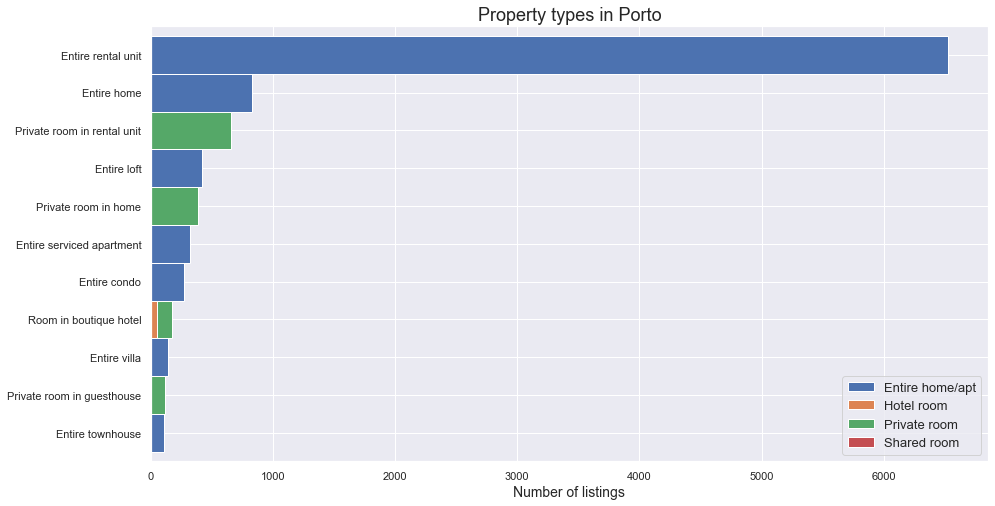

In [137]:
prop = portolisting.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])
prop.plot(kind='barh',stacked=True, linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Porto', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

In [ ]:
#Mapas 

In [138]:
lati= portolisting['latitude'].tolist()
longi=portolisting['longitude'].tolist()
localizacion = list(zip(lati, longi))

In [139]:
mapa= folium.Map(location=[41.15, -8.61024], zoom_start=20.5)
FastMarkerCluster(data=localizacion).add_to(mapa)
mapa

In [ ]:
# Tipo de vivienda (casa entera, habitación...)

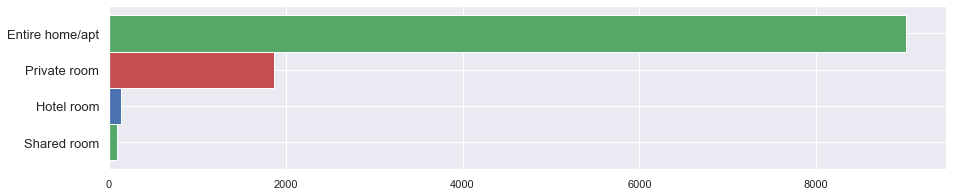

In [140]:
freq = portolisting['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

In [141]:
# En el conjunto vemos diferentes tipos de propiedades 
portolisting.property_type.unique()

array(['Entire home', 'Entire guesthouse', 'Entire townhouse',
       'Entire rental unit', 'Earthen home', 'Entire villa',
       'Entire condo', 'Tiny home', 'Shared room in bed and breakfast',
       'Private room in casa particular', 'Private room in hostel',
       'Private room in villa', 'Private room in home',
       'Private room in farm stay', 'Private room in rental unit',
       'Entire guest suite', 'Entire cottage', 'Farm stay', 'Windmill',
       'Shared room in hostel', 'Tent', 'Entire cabin', 'Dome', 'Floor',
       'Boat', 'Private room in guesthouse', 'Entire loft',
       'Private room in condo', 'Room in boutique hotel',
       'Private room in townhouse', 'Entire chalet',
       'Entire serviced apartment', 'Private room in bed and breakfast',
       'Private room in guest suite', 'Private room in loft',
       'Private room in serviced apartment', 'Casa particular',
       'Camper/RV', 'Room in hostel', 'Private room in cottage',
       'Private room in nature lo

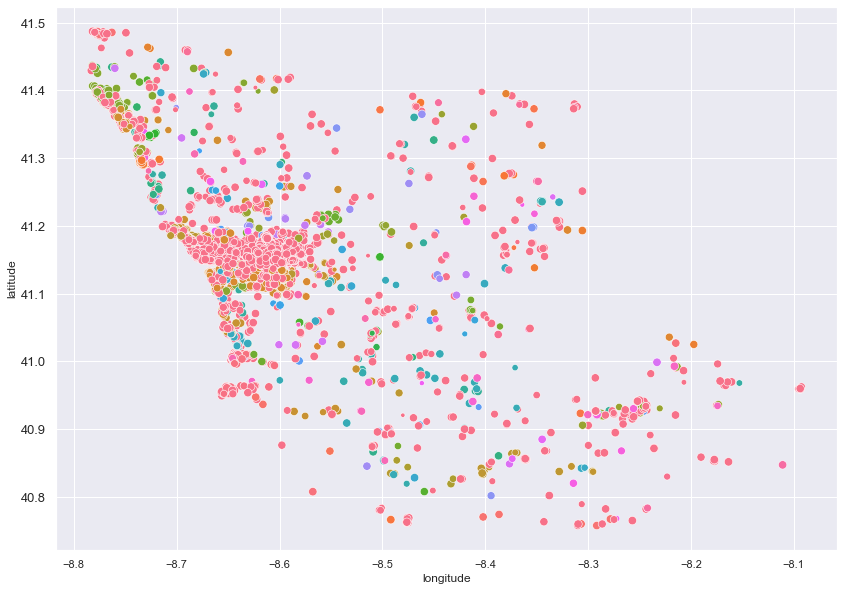

In [142]:
#Precio barrio-vecindario
plt.figure(figsize=(14,10))
sns.scatterplot(portolisting['longitude'], portolisting['latitude'],
                size=portolisting['price'],
                hue=portolisting['neighbourhood'], legend=False);

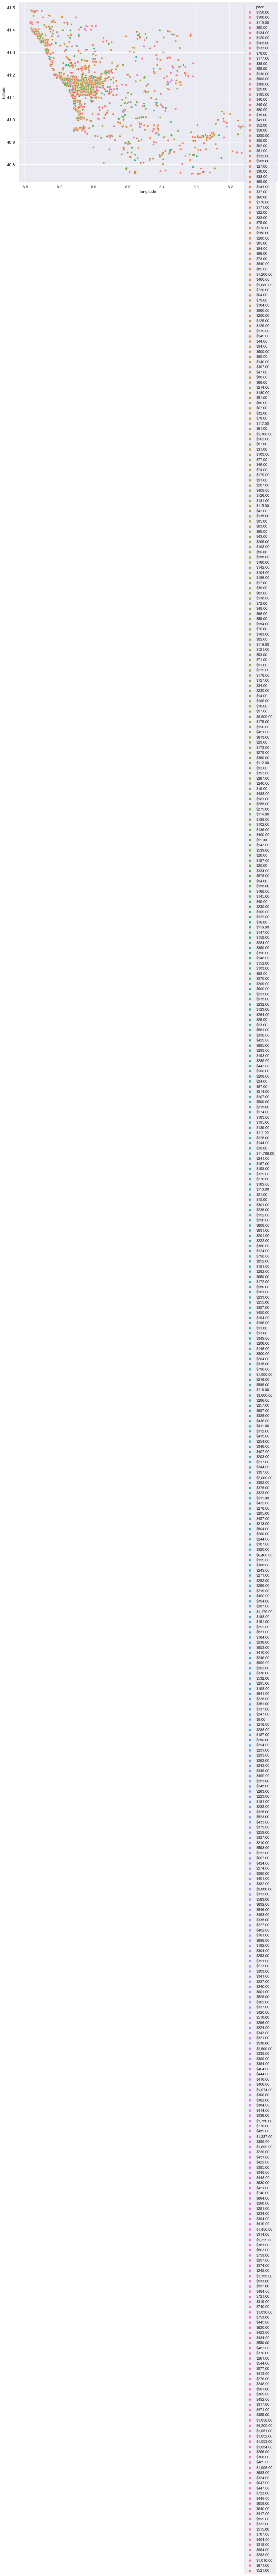

In [146]:
# Visualización por precio
plt.figure(figsize=(14,10))
sns.scatterplot(portolisting['longitude'], portolisting['latitude'],
                hue=portolisting['price']);

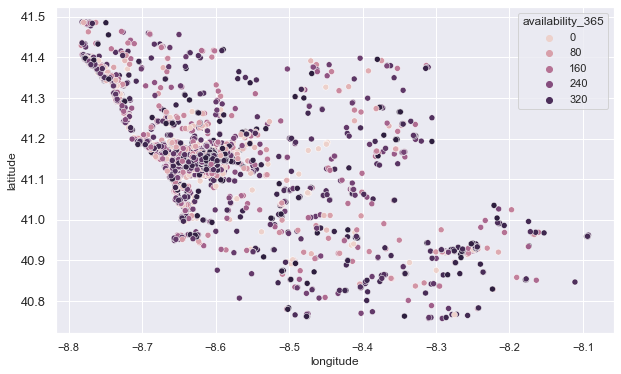

In [144]:
#Habitaciones disponibles
plt.figure(figsize=(10,6))
sns.scatterplot(portolisting.longitude,portolisting.latitude,hue=portolisting.availability_365)
plt.ioff()

In [152]:
portolisting.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#vemos los cambios
portolisting.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,20480198,https://www.airbnb.com/rooms/20480198,20220610041503,2022-06-10,Casa de São João,Uma pérola envolta da magia da região de Lafõe...,"Porto is an amazing city to explore on foot, w...",https://a0.muscache.com/pictures/e500c794-30b2...,https://www.airbnb.com/users/show/146202861,Casa De São João,...,5.000000,5.000000,5.000000,4.500000,Exempt,t,1,1,0,0
1,52337524,https://www.airbnb.com/rooms/52337524,20220610041503,2022-06-10,Detached Guest House in Luxury Villa with Pool,Luxury Villa between Porto and Braga at 20 min...,Quiet Luxury countryside region,https://a0.muscache.com/pictures/5b34cbd2-0ca8...,https://www.airbnb.com/users/show/423414022,Eduardo,...,5.000000,5.000000,5.000000,3.500000,13286/AL,t,1,1,0,0
2,18616304,https://www.airbnb.com/rooms/18616304,20220610041503,2022-06-10,Rustic house by the beach,"Great place by the beach (50 meters away), one...",Peaceful neighbourhood <br />Bordering with na...,https://a0.muscache.com/pictures/44dd10c6-d356...,https://www.airbnb.com/users/show/129318702,Cecília,...,4.830000,4.760000,4.720000,4.760000,56289/AL,f,1,1,0,0
3,49499436,https://www.airbnb.com/rooms/49499436,20220610041503,2022-06-10,Moradia geminada moderna a 2m da praia,Moradia T2 completa sem existir a possibilidad...,"Porto is an amazing city to explore on foot, w...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/399215419,Fernando,...,4.810972,4.815755,4.749315,4.668226,115355/AL,f,1,1,0,0
4,596254806601732230,https://www.airbnb.com/rooms/596254806601732230,20220610041503,2022-06-10,"The Shore @ Atlantic Beachfront - Patio, Tiny ...","Located on the beachfront, this luxury propert...",This cottage is at the very heart of old Espin...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/131440428,Elisa & André,...,5.000000,5.000000,5.000000,4.670000,123474/AL,t,3,3,0,0


In [ ]:
# Dueños de las pisos/casas con mas propiedades.

In [157]:
portolisting = portolisting[portolisting['room_type'] == "Private room"]
host_private = portolisting.groupby([ 'host_name',]).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

,host_name,private_rooms
284,Maria,46
176,GuestReady,41
453,Uporto House,33
217,Jorge,33
355,Pedro,33
